<a href="https://colab.research.google.com/github/elnglr/datascipy/blob/main/tensorflowcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)
model.fit(xs, ys, epochs=100)

In [ ]:
print(model.predict([10.0]))
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
import matplotlib.pyplot as plt
plt.imshow(training_images[5])
print(training_labels[1])
print(training_images[0])

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.1040
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.1009
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.0998
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.1007
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.0995


In [ ]:
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

[0.10096507 0.10061646 0.09699725 0.09982303 0.09987324 0.09953307
 0.09852774 0.10021438 0.10010937 0.10334041]
9
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5804 - accuracy: 0.7919
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3691 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3223 - accuracy: 0.8813
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2966 - accuracy: 0.8910
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2817 - accuracy: 0.8960


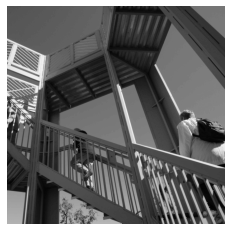

In [ ]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()


In [ ]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]
# This filter detects edges nicely
# It creates a filter that only passes through sharp edges and straight lines. 
# Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]] 
# A couple more filters to try for fun!
#filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
 # If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
      output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (i[x, y] * filter[1][1])
      output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      i_transformed[x, y] = output_pixel

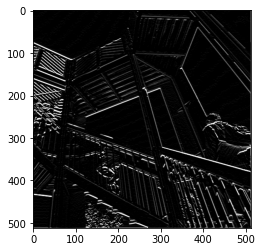

In [ ]:
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   


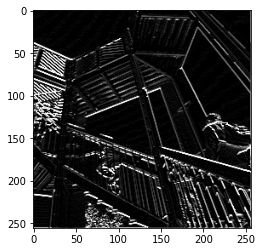

In [ ]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]
 
# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

2.4.1
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_21 (Dense)             (None, 10)        

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images = training_images/255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images/255.0
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
tf.keras.layers.MaxPooling2D(2, 2),
#Add another convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2, 2),
#Now flatten the output. After this you'll just have the same DNN structure as the non convolutional version
tf.keras.layers.Flatten(),
#The same 128 dense layers, and 10 output layers as in the pre-convolution example:
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_acc*100))

Epoch 1/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.5984 - accuracy: 0.7837
Epoch 2/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3046 - accuracy: 0.8893
Epoch 3/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2493 - accuracy: 0.9067
Epoch 4/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2211 - accuracy: 0.9192
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.2904 - accuracy: 0.9039
Test loss: 0.2903915047645569, Test accuracy: 90.39000272750854


[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


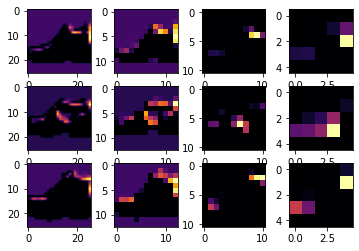

In [ ]:
print(test_labels[:100])
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 6
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)
  

In [6]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip  -O /tmp/horse-or-human.zip

import os
import zipfile
 
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()



--2021-05-17 21:49:29--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 172.253.63.128, 142.250.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  89.7MB/s    in 1.6s    

2021-05-17 21:49:31 (89.7 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [4]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip  -O /tmp/horse-or-human.zip


--2021-05-17 21:49:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.217.164.176, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   126MB/s    in 1.1s    

2021-05-17 21:49:01 (126 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]




First, configure the matplot parameters:



['horse30-2.png', 'horse21-6.png', 'horse43-2.png', 'horse12-6.png', 'horse07-1.png', 'horse02-0.png', 'horse24-1.png', 'horse37-3.png', 'horse32-2.png', 'horse40-8.png']
['human05-09.png', 'human11-05.png', 'human09-11.png', 'human16-07.png', 'human14-01.png', 'human14-04.png', 'human03-07.png', 'human08-18.png', 'human05-01.png', 'human15-18.png']


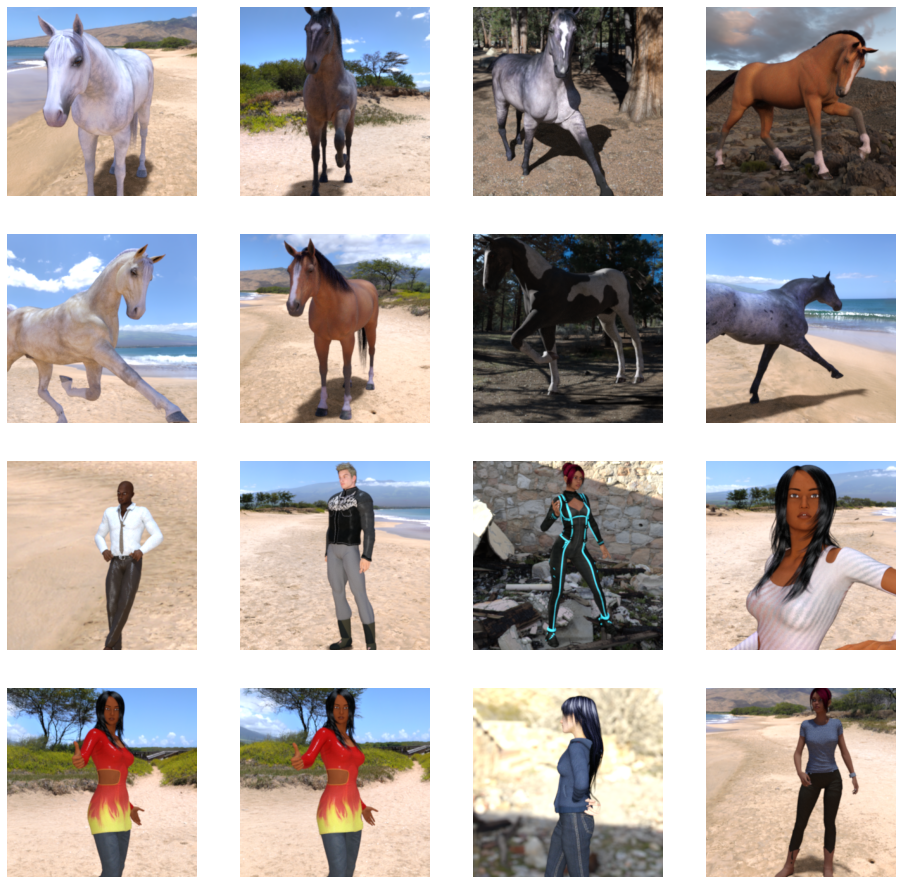

In [7]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
 
# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
 
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])
 
# Index for iterating over images
pic_index = 0
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
 
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]
 
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
 
  img = mpimg.imread(img_path)
  plt.imshow(img)
 
plt.show()




In [9]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

In [13]:
from tensorflow.keras.optimizers import RMSprop
 
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
 
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [14]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=5, #epoch number can be increased
      verbose=1)

Epoch 1/5
8/8 [==============================] - 68s 8s/step - loss: 0.9262 - acc: 0.5111
Epoch 2/5
8/8 [==============================] - 66s 8s/step - loss: 0.6438 - acc: 0.7527
Epoch 3/5
8/8 [==============================] - 66s 8s/step - loss: 0.6889 - acc: 0.7260
Epoch 4/5
8/8 [==============================] - 67s 8s/step - loss: 0.3350 - acc: 0.8703
Epoch 5/5
8/8 [==============================] - 67s 8s/step - loss: 0.4727 - acc: 0.8526


Now actually run a prediction using the model. The code will allow you to choose one or more files from your file system. It will then upload them and run them through the model, giving an indication of whether the object is a horse or a human.

You can download images from the internet to your file system to try them out! Note that you might see that the network makes a lot of mistakes despite the fact that the training accuracy is above 99%.

That's due to something called overfitting, which means that the neural network is trained with very limited data (there are only roughly 500 images of each class). So it's very good at recognizing images that look like those in the training set, but it can fail a lot at images that are not in the training set.

That's a datapoint proving that the more data that you train on, the better your final network will be!

There are many techniques that can be used to make your training better, despite limited data, including something called image augmentation, but that's beyond the scope of this codelab.



In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

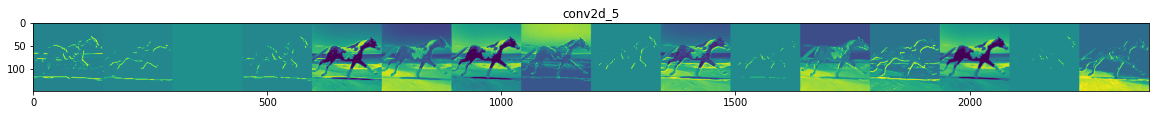

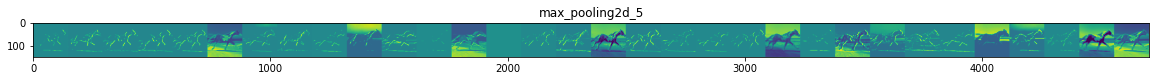

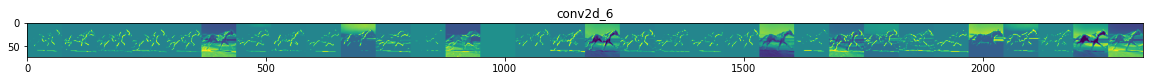

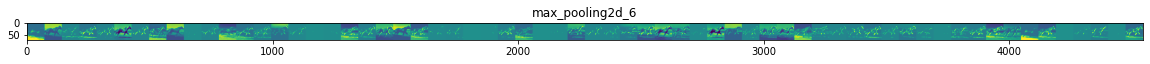

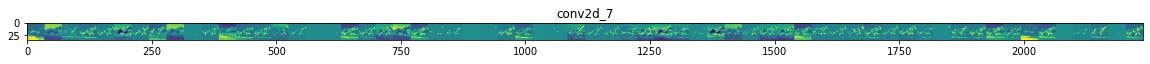

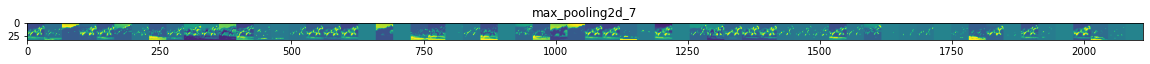

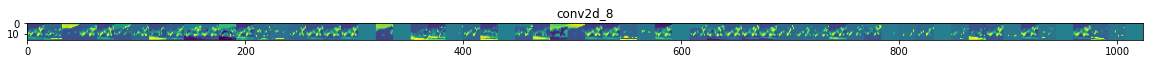

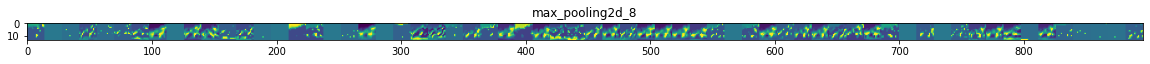

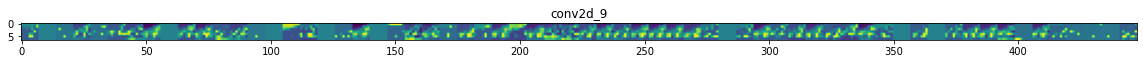

In [19]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
 
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
 
img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
 
# Rescale by 1/255
x /= 255
 
# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)
 
# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
 
# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      if x.std()>0:
        x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')